In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history.history['accuracy'])
    plt.plot(history.history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()

def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history.history['loss'])
    plt.plot(history.history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

In [2]:
df = pd.read_csv("../data/preprocessed_data.csv")
x = df[df.columns.tolist()[:-1]]
y = df[df.columns.tolist()[-1]]

In [3]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(120, input_dim=119 ,activation='relu'),        
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               14400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 14,521
Trainable params: 14,521
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x, y, epochs=30, validation_split=0.3)

Train on 919 samples, validate on 395 samples
Epoch 1/30
919/919 [==============================] - 1s 672us/sample - loss: 0.6863 - accuracy: 0.5582 - val_loss: 0.6546 - val_accuracy: 0.6481
Epoch 2/30
919/919 [==============================] - 0s 106us/sample - loss: 0.6416 - accuracy: 0.6485 - val_loss: 0.6419 - val_accuracy: 0.6532
Epoch 3/30
919/919 [==============================] - 0s 96us/sample - loss: 0.6103 - accuracy: 0.6921 - val_loss: 0.6394 - val_accuracy: 0.6658
Epoch 4/30
919/919 [==============================] - 0s 115us/sample - loss: 0.5836 - accuracy: 0.7149 - val_loss: 0.6358 - val_accuracy: 0.6532
Epoch 5/30
919/919 [==============================] - 0s 113us/sample - loss: 0.5579 - accuracy: 0.7454 - val_loss: 0.6381 - val_accuracy: 0.6430
Epoch 6/30
919/919 [==============================] - 0s 96us/sample - loss: 0.5338 - accuracy: 0.7628 - val_loss: 0.6416 - val_accuracy: 0.6532
Epoch 7/30
919/919 [==============================] - 0s 135us/sample - loss: 0.

In [7]:
scores = model.evaluate(x,y)
print("{}: {}".format(model.metrics_names[1], scores[1]*100))

1314/1314 [==============================] - 0s 47us/sample - loss: 0.3264 - accuracy: 0.8782
accuracy: 87.82343864440918


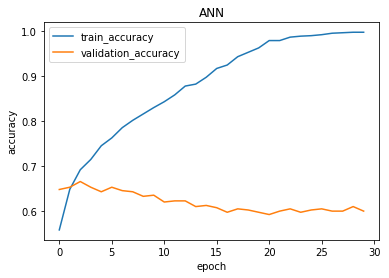

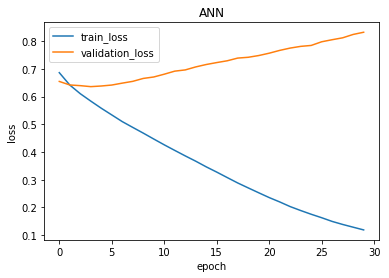

In [8]:
plot_accuracy(model,"ANN")
plot_loss(model,"ANN")

In [9]:
model.save("../models/model.h5")

In [10]:
model_loaded = tf.keras.models.load_model("../models/model.h5")

In [11]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               14400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 14,521
Trainable params: 14,521
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_loaded.predict(x.iloc[0:1,:].to_numpy())[0,0]

0.16512422

In [25]:
x.iloc[0:1,:]

,abaddon,abyssal_underlord,alchemist,ancient_apparition,antimage,arc_warden,axe,bane,batrider,beastmaster,...,viper,visage,void_spirit,warlock,weaver,windrunner,winter_wyvern,wisp,witch_doctor,zuus
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
